# Recurrent Neural Networks

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Time series forecasting

In [2]:
df = pd.read_csv('../data/cansim-0800020-eng-6674700030567901031.csv',
                 skiprows=6, skipfooter=9,
                 engine='python')
df.head()

,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083


In [3]:
from pandas.tseries.offsets import MonthEnd

In [6]:
df['Adjustments'] = pd.to_datetime(df['Adjustments']) + MonthEnd(1)
df = df.set_index('Adjustments')
df.head()

KeyError: 'Adjustments'

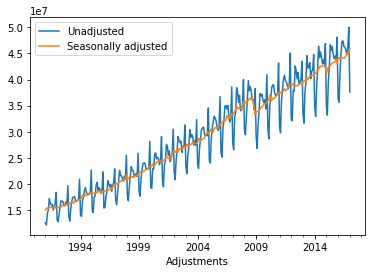

In [7]:
df.plot()

In [8]:
split_date = pd.Timestamp('01-01-2011')

In [9]:
train = df.loc[:split_date, ['Unadjusted']]
test = df.loc[split_date:, ['Unadjusted']]

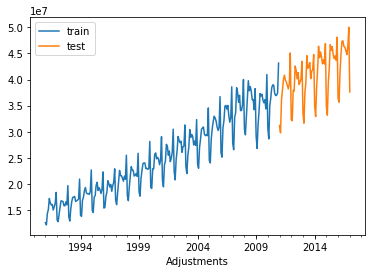

In [10]:
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [11]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [18]:
train_sc[1:]

array([[0.        ],
       [0.0704258 ],
       [0.09531795],
       [0.16362761],
       [0.13514108],
       [0.12395846],
       [0.12617398],
       [0.09230917],
       [0.11139526],
       [0.13173822],
       [0.20091289],
       [0.03002688],
       [0.01999285],
       [0.06596369],
       [0.10983126],
       [0.14912986],
       [0.14718865],
       [0.14464787],
       [0.11898427],
       [0.11802682],
       [0.14222108],
       [0.12459168],
       [0.24290801],
       [0.04899091],
       [0.02408276],
       [0.09865054],
       [0.14480155],
       [0.17061844],
       [0.17067229],
       [0.17603636],
       [0.1449117 ],
       [0.14957943],
       [0.15381982],
       [0.16036484],
       [0.28308682],
       [0.05971347],
       [0.05306762],
       [0.15199345],
       [0.17230214],
       [0.21246911],
       [0.23131079],
       [0.1982186 ],
       [0.19187716],
       [0.19381714],
       [0.18857277],
       [0.20528237],
       [0.33988685],
       [0.089

In [22]:
train_sc[:-1]

array([[0.01402033],
       [0.        ],
       [0.0704258 ],
       [0.09531795],
       [0.16362761],
       [0.13514108],
       [0.12395846],
       [0.12617398],
       [0.09230917],
       [0.11139526],
       [0.13173822],
       [0.20091289],
       [0.03002688],
       [0.01999285],
       [0.06596369],
       [0.10983126],
       [0.14912986],
       [0.14718865],
       [0.14464787],
       [0.11898427],
       [0.11802682],
       [0.14222108],
       [0.12459168],
       [0.24290801],
       [0.04899091],
       [0.02408276],
       [0.09865054],
       [0.14480155],
       [0.17061844],
       [0.17067229],
       [0.17603636],
       [0.1449117 ],
       [0.14957943],
       [0.15381982],
       [0.16036484],
       [0.28308682],
       [0.05971347],
       [0.05306762],
       [0.15199345],
       [0.17230214],
       [0.21246911],
       [0.23131079],
       [0.1982186 ],
       [0.19187716],
       [0.19381714],
       [0.18857277],
       [0.20528237],
       [0.339

In [21]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

print(y_train.shape)

(239, 1)


### Fully connected predictor

In [23]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [24]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [25]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

In [26]:
model.fit(X_train, y_train, epochs=200,
          batch_size=2, verbose=1,
          callbacks=[early_stop])

Epoch 1/200
239/239 [==============================] - 3s 11ms/step - loss: 0.1469
Epoch 2/200
239/239 [==============================] - 0s 814us/step - loss: 0.0537
Epoch 3/200
239/239 [==============================] - 0s 781us/step - loss: 0.0331
Epoch 4/200
239/239 [==============================] - 0s 819us/step - loss: 0.0295
Epoch 5/200
239/239 [==============================] - 0s 812us/step - loss: 0.0264
Epoch 6/200
239/239 [==============================] - 0s 803us/step - loss: 0.0234
Epoch 7/200
239/239 [==============================] - 0s 788us/step - loss: 0.0207
Epoch 8/200
239/239 [==============================] - 0s 798us/step - loss: 0.0183
Epoch 9/200
239/239 [==============================] - 0s 857us/step - loss: 0.0162
Epoch 10/200
239/239 [==============================] - 0s 897us/step - loss: 0.0146
Epoch 11/200
239/239 [==============================] - 0s 791us/step - loss: 0.0131
Epoch 12/200
239/239 [==============================] - 0s 807us/step - los

In [28]:
y_pred = model.predict(X_test)

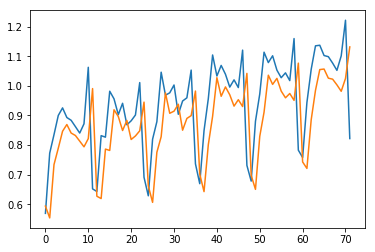

In [29]:
plt.plot(y_test)
plt.plot(y_pred)

### Recurrent predictor

In [30]:
from keras.layers import LSTM

In [31]:
X_train.shape

(239, 1)

In [32]:
#3D tensor with shape (batch_size, timesteps, input_dim)
X_train[:, None].shape

(239, 1, 1)

In [33]:
X_train_t = X_train[:, None]
X_test_t = X_test[:, None]

In [34]:
K.clear_session()
model = Sequential()

model.add(LSTM(6, input_shape=(1, 1)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [35]:
model.fit(X_train_t, y_train,
          epochs=100, batch_size=1, verbose=1,
          callbacks=[early_stop])

Epoch 1/100
239/239 [==============================] - 1s 5ms/step - loss: 0.1012
Epoch 2/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0322
Epoch 3/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0259
Epoch 4/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0202
Epoch 5/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0158
Epoch 6/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0129
Epoch 7/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0112
Epoch 8/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0106
Epoch 9/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0104
Epoch 10/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0101
Epoch 11/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0103
Epoch 00011: early stopping


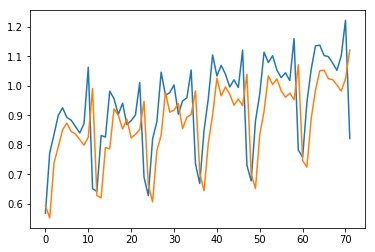

In [36]:
y_pred = model.predict(X_test_t)
plt.plot(y_test)
plt.plot(y_pred)

## Windows

In [37]:
train_sc.shape

(240, 1)

In [38]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)
train_sc_df.head()

,Scaled
Adjustments,
1991-01-31,0.014020
1991-02-28,0.000000
1991-03-31,0.070426
1991-04-30,0.095318
1991-05-31,0.163628


In [39]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

In [40]:
train_sc_df.head(13)

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,,
1991-01-31,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-28,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-31,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-30,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-31,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-06-30,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-31,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN
1991-08-31,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN
1991-09-30,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN


In [41]:
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [42]:
X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,
1992-01-31,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020
1992-02-29,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000
1992-03-31,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426
1992-04-30,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318
1992-05-31,0.109831,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628


In [43]:
X_train.shape

(228, 12)

In [44]:
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values

### Fully Connected on Windows

In [45]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(X_train, y_train, epochs=200,
          batch_size=1, verbose=1, callbacks=[early_stop])

Epoch 1/200
228/228 [==============================] - 0s 2ms/step - loss: 0.1163
Epoch 2/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0111
Epoch 3/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 4/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 5/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 6/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 7/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 8/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 9/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 10/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 11/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 12/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 13/200


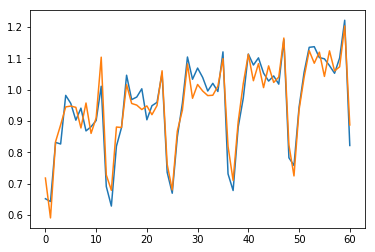

In [47]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)

### LSTM on Windows

In [48]:
X_train_t = X_train.reshape(X_train.shape[0], 1, 12)
X_test_t = X_test.reshape(X_test.shape[0], 1, 12)

In [49]:
X_train_t.shape

(228, 1, 12)

In [59]:
K.clear_session()
model = Sequential()

model.add(LSTM(12, input_shape=(1, 12)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [60]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 12)                1200      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 1,213
Trainable params: 1,213
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.fit(X_train_t, y_train, epochs=100,
          batch_size=1, verbose=1, callbacks=[early_stop])

Epoch 1/100
228/228 [==============================] - 1s 5ms/step - loss: 0.0275
Epoch 2/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0080
Epoch 3/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0067
Epoch 4/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0058
Epoch 5/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0050
Epoch 6/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0039
Epoch 7/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0032
Epoch 8/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0027
Epoch 9/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0024
Epoch 10/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0021
Epoch 11/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0020
Epoch 12/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0019
Epoch 13/100


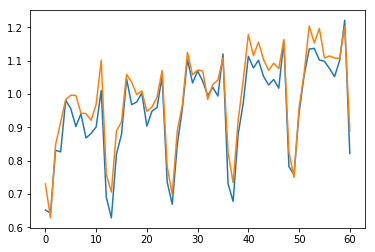

In [62]:
y_pred = model.predict(X_test_t)
plt.plot(y_test)
plt.plot(y_pred)

## Exercise 1

In the model above we reshaped the input shape to: `(num_samples, 1, 12)`, i.e. we treated a window of 12 months as a vector of 12 coordinates that we simultaneously passed to all the LSTM nodes. An alternative way to look at the problem is to reshape the input to `(num_samples, 12, 1)`. This means we consider each input window as a sequence of 12 values that we will pass in sequence to the LSTM. In principle this looks like a more accurate description of our situation. But does it yield better predictions? Let's check it.

- Reshape `X_train` and `X_test` so that they represent a set of univariate sequences
- retrain the same LSTM(6) model, you'll have to adapt the `input_shape`
- check the performance of this new model, is it better at predicting the test data?

In [74]:
X_train_new = X_train.reshape(-1,12,1)
X_test_new = X_test.reshape(-1,12,1)

In [90]:
K.clear_session()
model = Sequential()

model.add(LSTM(24, input_shape=(12, 1)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 24)                2496      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.fit(X_train_new, y_train, epochs=600,
          batch_size=64, verbose=1)

Epoch 1/600
228/228 [==============================] - 0s 2ms/step - loss: 0.3767
Epoch 2/600
228/228 [==============================] - 0s 221us/step - loss: 0.3115
Epoch 3/600
228/228 [==============================] - 0s 211us/step - loss: 0.2514
Epoch 4/600
228/228 [==============================] - 0s 197us/step - loss: 0.1944
Epoch 5/600
228/228 [==============================] - 0s 207us/step - loss: 0.1448
Epoch 6/600
228/228 [==============================] - 0s 209us/step - loss: 0.0998
Epoch 7/600
228/228 [==============================] - 0s 210us/step - loss: 0.0616
Epoch 8/600
228/228 [==============================] - 0s 194us/step - loss: 0.0341
Epoch 9/600
228/228 [==============================] - 0s 222us/step - loss: 0.0199
Epoch 10/600
228/228 [==============================] - 0s 204us/step - loss: 0.0205
Epoch 11/600
228/228 [==============================] - 0s 205us/step - loss: 0.0248
Epoch 12/600
228/228 [==============================] - 0s 201us/step - loss

228/228 [==============================] - 0s 201us/step - loss: 0.0081
Epoch 98/600
228/228 [==============================] - 0s 207us/step - loss: 0.0082
Epoch 99/600
228/228 [==============================] - 0s 191us/step - loss: 0.0081
Epoch 100/600
228/228 [==============================] - 0s 193us/step - loss: 0.0081
Epoch 101/600
228/228 [==============================] - 0s 195us/step - loss: 0.0081
Epoch 102/600
228/228 [==============================] - 0s 196us/step - loss: 0.0081
Epoch 103/600
228/228 [==============================] - 0s 198us/step - loss: 0.0081
Epoch 104/600
228/228 [==============================] - 0s 205us/step - loss: 0.0081
Epoch 105/600
228/228 [==============================] - 0s 199us/step - loss: 0.0081
Epoch 106/600
228/228 [==============================] - 0s 196us/step - loss: 0.0080
Epoch 107/600
228/228 [==============================] - 0s 193us/step - loss: 0.0080
Epoch 108/600
228/228 [==============================] - 0s 192us/step

228/228 [==============================] - 0s 219us/step - loss: 0.0069
Epoch 193/600
228/228 [==============================] - 0s 198us/step - loss: 0.0069
Epoch 194/600
228/228 [==============================] - 0s 215us/step - loss: 0.0069
Epoch 195/600
228/228 [==============================] - 0s 236us/step - loss: 0.0069
Epoch 196/600
228/228 [==============================] - 0s 212us/step - loss: 0.0069
Epoch 197/600
228/228 [==============================] - 0s 211us/step - loss: 0.0069
Epoch 198/600
228/228 [==============================] - 0s 201us/step - loss: 0.0068
Epoch 199/600
228/228 [==============================] - 0s 215us/step - loss: 0.0068
Epoch 200/600
228/228 [==============================] - 0s 217us/step - loss: 0.0068
Epoch 201/600
228/228 [==============================] - 0s 218us/step - loss: 0.0068
Epoch 202/600
228/228 [==============================] - 0s 250us/step - loss: 0.0068
Epoch 203/600
228/228 [==============================] - 0s 209us/st

228/228 [==============================] - 0s 200us/step - loss: 0.0054
Epoch 288/600
228/228 [==============================] - 0s 194us/step - loss: 0.0054
Epoch 289/600
228/228 [==============================] - 0s 190us/step - loss: 0.0054
Epoch 290/600
228/228 [==============================] - 0s 188us/step - loss: 0.0054
Epoch 291/600
228/228 [==============================] - 0s 195us/step - loss: 0.0054
Epoch 292/600
228/228 [==============================] - 0s 188us/step - loss: 0.0053
Epoch 293/600
228/228 [==============================] - 0s 193us/step - loss: 0.0053
Epoch 294/600
228/228 [==============================] - 0s 204us/step - loss: 0.0053
Epoch 295/600
228/228 [==============================] - 0s 205us/step - loss: 0.0052
Epoch 296/600
228/228 [==============================] - 0s 185us/step - loss: 0.0052
Epoch 297/600
228/228 [==============================] - 0s 192us/step - loss: 0.0052
Epoch 298/600
228/228 [==============================] - 0s 190us/st

228/228 [==============================] - 0s 203us/step - loss: 0.0019
Epoch 383/600
228/228 [==============================] - 0s 200us/step - loss: 0.0019
Epoch 384/600
228/228 [==============================] - 0s 202us/step - loss: 0.0018
Epoch 385/600
228/228 [==============================] - 0s 192us/step - loss: 0.0019
Epoch 386/600
228/228 [==============================] - 0s 204us/step - loss: 0.0019
Epoch 387/600
228/228 [==============================] - 0s 205us/step - loss: 0.0019
Epoch 388/600
228/228 [==============================] - 0s 204us/step - loss: 0.0018
Epoch 389/600
228/228 [==============================] - 0s 208us/step - loss: 0.0017
Epoch 390/600
228/228 [==============================] - 0s 218us/step - loss: 0.0017
Epoch 391/600
228/228 [==============================] - 0s 211us/step - loss: 0.0016
Epoch 392/600
228/228 [==============================] - 0s 220us/step - loss: 0.0017
Epoch 393/600
228/228 [==============================] - 0s 215us/st

228/228 [==============================] - 0s 209us/step - loss: 0.0010
Epoch 477/600
228/228 [==============================] - 0s 221us/step - loss: 9.6082e-04
Epoch 478/600
228/228 [==============================] - 0s 213us/step - loss: 9.2984e-04
Epoch 479/600
228/228 [==============================] - 0s 200us/step - loss: 9.6374e-04
Epoch 480/600
228/228 [==============================] - 0s 202us/step - loss: 9.6000e-04
Epoch 481/600
228/228 [==============================] - 0s 208us/step - loss: 0.0010
Epoch 482/600
228/228 [==============================] - 0s 191us/step - loss: 9.5441e-04
Epoch 483/600
228/228 [==============================] - 0s 195us/step - loss: 9.4812e-04
Epoch 484/600
228/228 [==============================] - 0s 197us/step - loss: 9.6175e-04
Epoch 485/600
228/228 [==============================] - 0s 196us/step - loss: 9.2678e-04
Epoch 486/600
228/228 [==============================] - 0s 190us/step - loss: 9.3852e-04
Epoch 487/600
228/228 [=========

228/228 [==============================] - 0s 190us/step - loss: 8.8461e-04
Epoch 568/600
228/228 [==============================] - 0s 197us/step - loss: 9.2569e-04
Epoch 569/600
228/228 [==============================] - 0s 202us/step - loss: 9.2812e-04
Epoch 570/600
228/228 [==============================] - 0s 193us/step - loss: 9.2806e-04
Epoch 571/600
228/228 [==============================] - 0s 191us/step - loss: 9.6043e-04
Epoch 572/600
228/228 [==============================] - 0s 196us/step - loss: 8.9863e-04
Epoch 573/600
228/228 [==============================] - 0s 189us/step - loss: 8.8891e-04
Epoch 574/600
228/228 [==============================] - 0s 189us/step - loss: 9.2255e-04
Epoch 575/600
228/228 [==============================] - 0s 194us/step - loss: 9.0834e-04
Epoch 576/600
228/228 [==============================] - 0s 214us/step - loss: 8.9131e-04
Epoch 577/600
228/228 [==============================] - 0s 220us/step - loss: 9.0440e-04
Epoch 578/600
228/228 [=

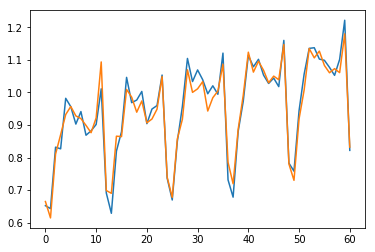

In [92]:
y_pred = model.predict(X_test_new)
plt.plot(y_test)
plt.plot(y_pred)

## Exercise 2

RNN models can be applied to images too. In general we can apply them to any data where there's a connnection between nearby units. Let's see how we can easily build a model that works with images.

- Load the MNIST data, by now you should be able to do it blindfolded :)
- reshape it so that an image looks like a long sequence of pixels
- create a recurrent model and train it on the training data
- how does it perform compared to a fully connected? How does it compare to Convolutional Neural Networks?

(feel free to run this exercise on a cloud GPU if it's too slow on your laptop)